# <font size='6' color='darkorange' face='Courier New'>**Page View Time Series Visualizer**</font>
<hr style="margin-bottom: 40px;">


In [ ]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use ('dark_background')
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Используйте Pandas для импорта данных из «fcc-forum-pageviews.csv». Установите индекс для столбца даты.

In [ ]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')

In [ ]:
# получение первых 5 строк таблицы df
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


## Очистите данные, отфильтровав дни, когда просмотры страниц находились в верхних 2,5 % набора данных или в нижних 2,5 % набора данных.

In [ ]:
# очистка данных
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

In [ ]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## Создайте функцию draw_line_plot, которая использует Matplotlib для рисования линейной диаграммы, похожей на `examples/Figure_1.png`.
Заголовок должен быть Ежедневные просмотры страниц форума freeCodeCamp 5/2016-12/2019. Метка на оси x должна быть датой, а метка на оси y должна быть просмотрами страниц.

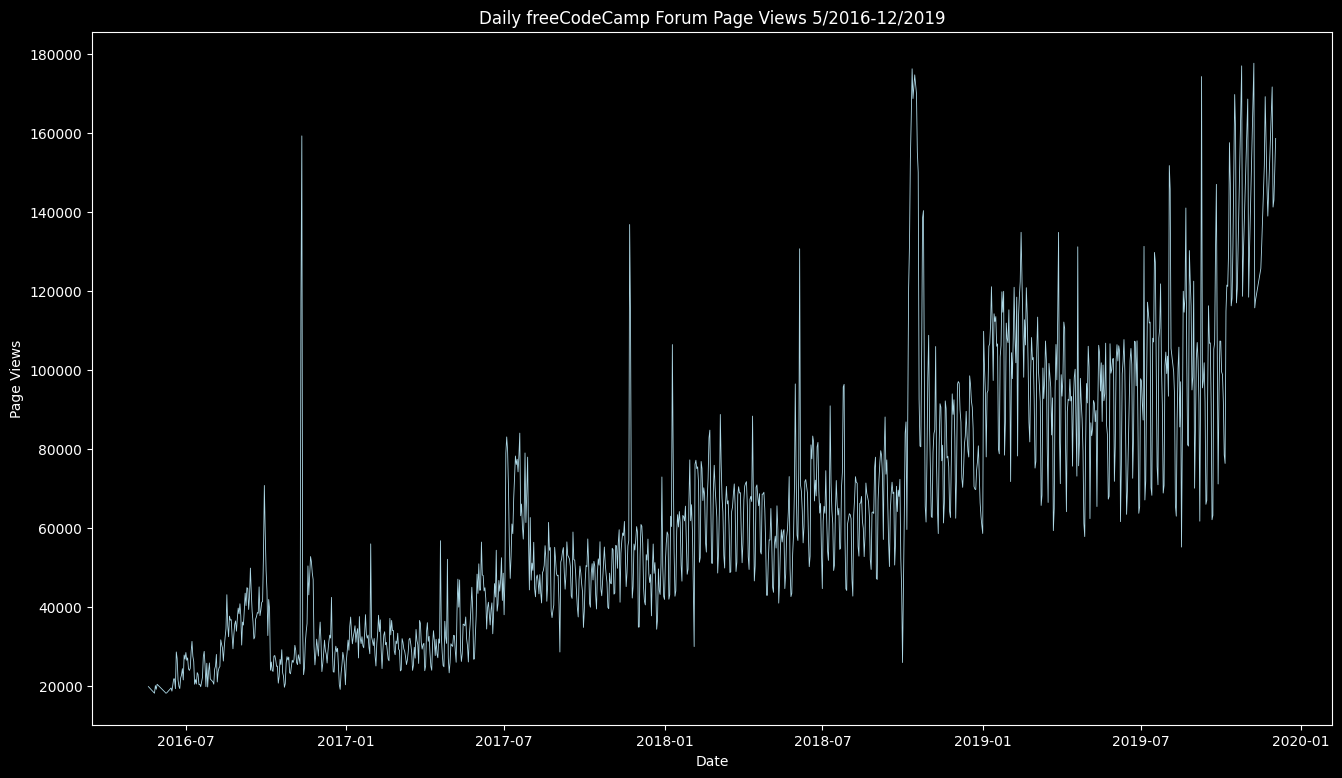

In [ ]:
# строим график Matplotlib используя функцию
def draw_line_plot():

    fig, ax = plt.subplots(figsize = (16, 9))
    plt.plot(df, color='#ADD8E6', linewidth = 0.6)
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Сохраняем график
    fig.savefig('Figure_1_line_plot.png')

draw_line_plot()

## Создайте функцию draw_bar_plot, которая рисует гистограмму, похожую на `examples/Figure_2.png`.
Он должен показывать средние ежедневные просмотры страниц за каждый месяц, сгруппированные по годам. Легенда должна отображать метки месяцев и иметь заголовок `Месяцы`.
На диаграмме метка по оси X должна быть `Года`, а метка по оси Y — `Среднее количество просмотров страниц`.

<Axes: title={'center': 'draw_bar_plot'}, xlabel='Year', ylabel='Average Page Views'>

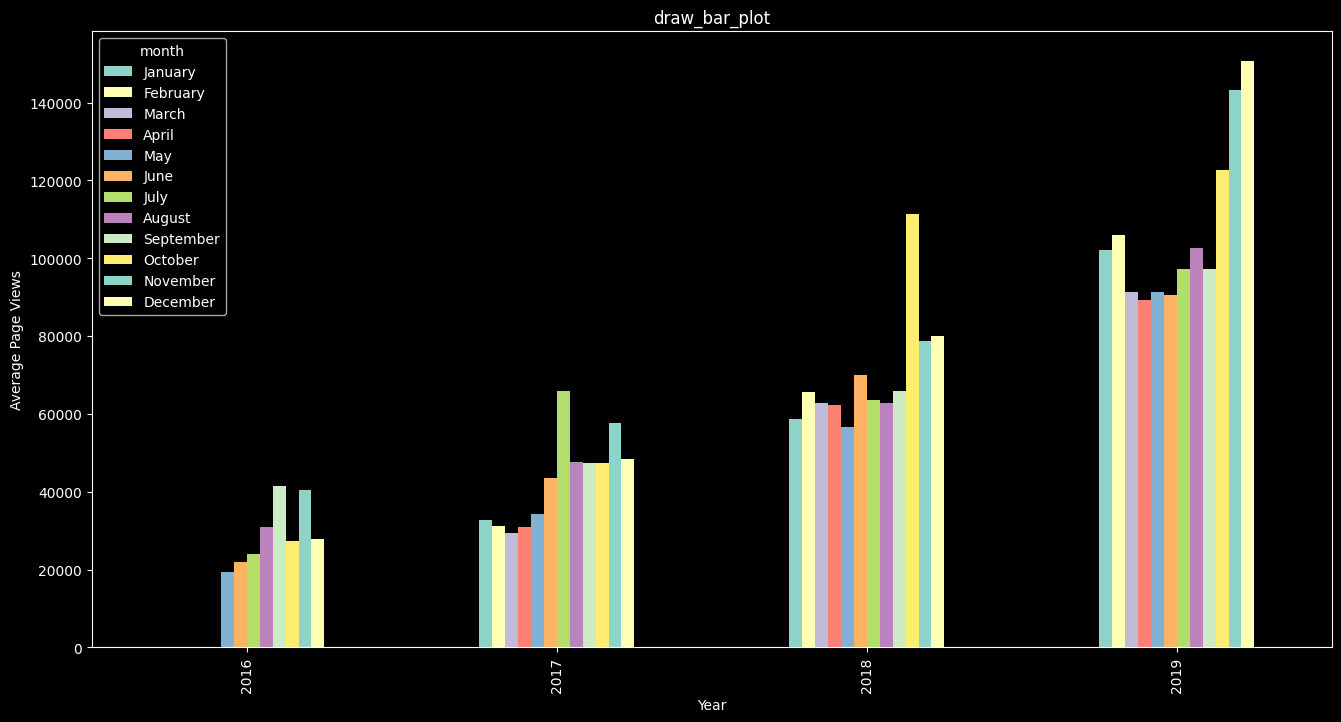

In [ ]:
# пишем функцию def
def draw_bar_plot():

    # создаем колонки 'месяц' и 'год' из колонки date(колонка является индексом)
    df['year'] = df.index.year
    df['month'] = df.index.month_name()

    # группируем и агрегируем по среднему значению и переиндексируем df
    df_bar = df.groupby(['year', 'month'])['value'].agg('mean').reset_index()

    # выводим сводную таблицу (готовим сводники) использую ф-цию. 'pivot_table'
    pv_tab = pd.pivot_table(df_bar, values = 'value', index = 'year',
                             columns = 'month', dropna = False)

    # месяца ставим в правильном порядке и используем метод 'reindex' для изменения столбцов
    months = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
    table = pv_tab.reindex(columns = months)


    # Строим график bar
    barplot = table.plot(kind='bar', figsize = (16,8), xlabel = 'Year',
                         ylabel = 'Average Page Views',  title = 'draw_bar_plot')

    return barplot

draw_bar_plot()

## Создайте функцию `draw_box_plot`, которая использует `Seaborn` для рисования двух соседних блочных диаграмм, подобных `examples/Figure_3.png`.
Эти диаграммы должны показывать, как значения распределяются в течение определенного года или месяца и как они соотносятся с течением времени. Название первой диаграммы должно быть «Годовая диаграмма (тренд)», а название второй диаграммы должно быть «Ящик-диаграмма по месяцам (сезонность)». Убедитесь, что метки месяца внизу начинаются с января, а оси x и y указаны правильно. Шаблон включает команды для подготовки данных.

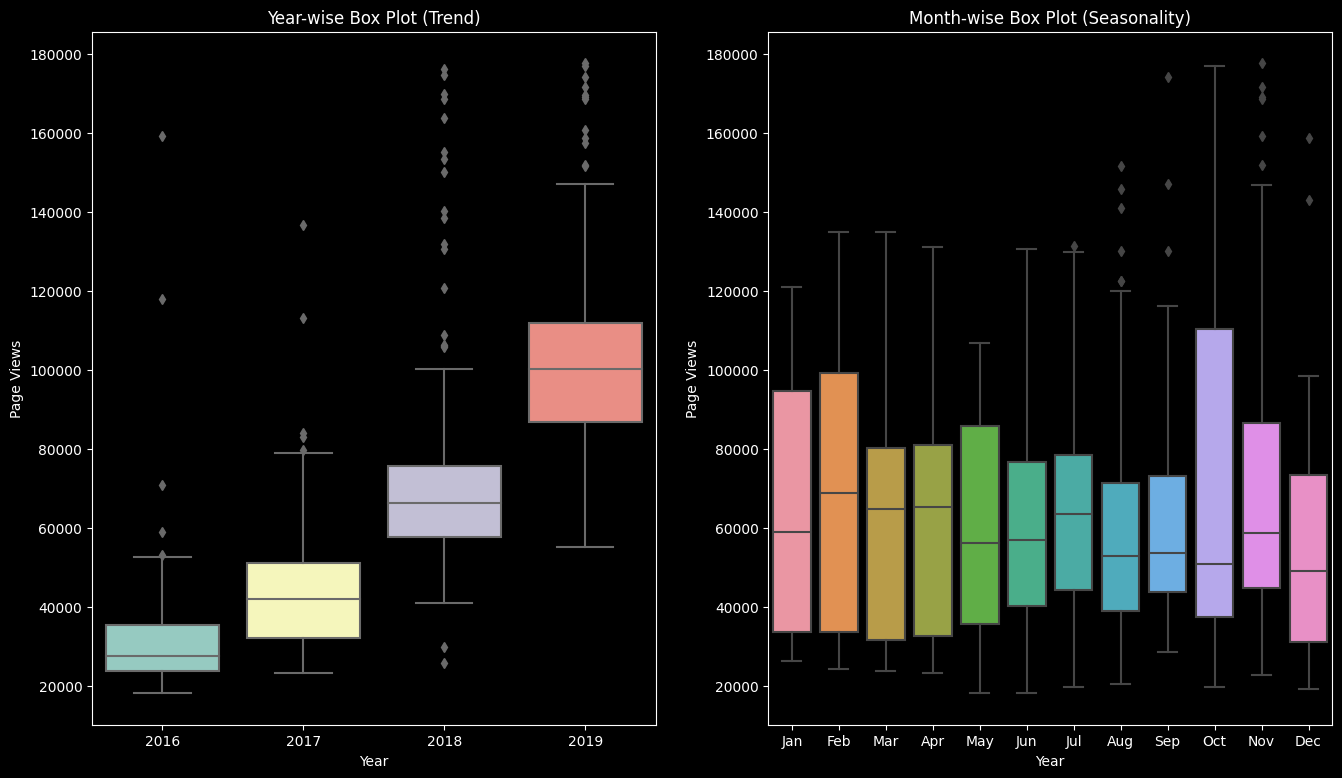

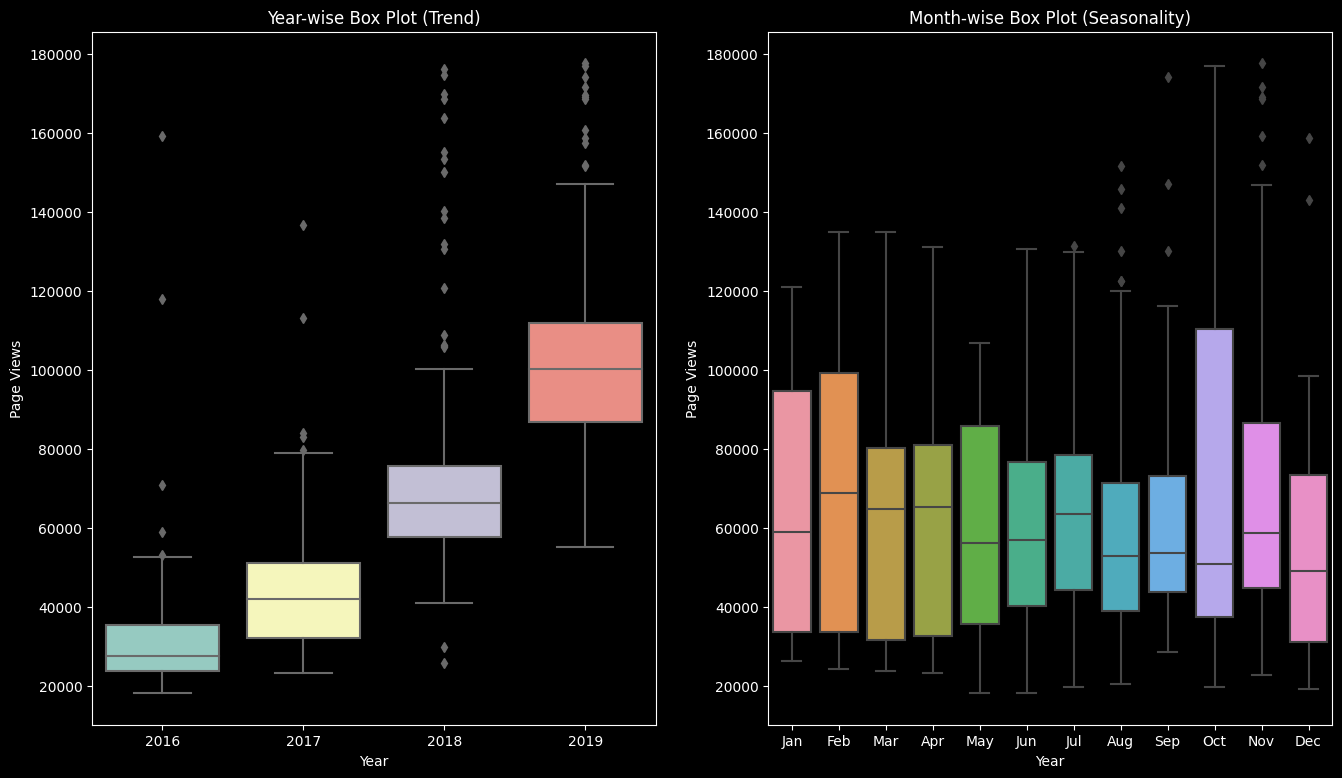

In [ ]:
# пишем функцию def
def draw_box_plot():

    # Подготовим данные
    df_box = df.copy() # Создаем копию df
    df_box.reset_index(inplace = True) # выполняем переиндексацию df
    df_box['year'], df_box['month'] = df_box['date'].apply(lambda x: x.year),\
                                      df_box['date'].apply(lambda x: x.strftime('%b'))
    # создаем колонки год и месяц через ф-цию. 'lambda'из date (используя x.strftime('%b')) название месяца сокращаем

    # Строим Box Plot 'ящик с усамии' спользуя Seaborn
    fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9)) # определяем габариты и размещаем 2 графика
    sns.boxplot(data = df_box, x = 'year', y = 'value', ax = ax1).\
                       set(title = 'Year-wise Box Plot (Trend)', xlabel = 'Year', ylabel = 'Page Views')
    sns.boxplot(data = df_box, x = 'month', y = 'value', ax = ax2,
                order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']).\
                       set(title = "Month-wise Box Plot (Seasonality)", xlabel = 'Year', ylabel = 'Page Views')

    # Сохраняем график
    fig.savefig('Figure_3_box_plot.png')
    return fig

draw_box_plot()